###Final Project Discovery
EDA for the Machine Learning Final Project

In [27]:
# Import Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df_raw = pd.read_csv('/content/drive/MyDrive/ML Final/Crash_Reporting_Drivers_Data.csv')
df_raw.info()

<ipython-input-29-b68284c083b9>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('/content/drive/MyDrive/ML Final/Crash_Reporting_Drivers_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195092 entries, 0 to 195091
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Report Number                  195092 non-null  object 
 1   Local Case Number              195092 non-null  object 
 2   Agency Name                    195092 non-null  object 
 3   ACRS Report Type               195092 non-null  object 
 4   Crash Date/Time                195092 non-null  object 
 5   Route Type                     176046 non-null  object 
 6   Road Name                      174120 non-null  object 
 7   Cross-Street Name              164696 non-null  object 
 8   Off-Road Description           18008 non-null   object 
 9   Municipality                   19126 non-null   object 
 10  Related Non-Motorist           6293 non-null    object 
 11  Collision Type                 194507 non-null  object 
 12  Weather                       

In [30]:
# find percentage of missing values for each column
missing_percentage = df_raw.isnull().sum() * 100 / len(df_raw)
missing_percentage

,0
Report Number,0.000000
Local Case Number,0.000000
Agency Name,0.000000
ACRS Report Type,0.000000
Crash Date/Time,0.000000
Route Type,9.762574
Road Name,10.749800
Cross-Street Name,15.580342
Off-Road Description,90.769483
Municipality,90.196420


Dropping non-important features, and replacing NA values with what makes most sense

In [31]:
df_copy = df_raw.copy()
df_copy.drop(['Local Case Number', 'Report Number', 'Road Name', 'Traffic Control', 'Cross-Street Name', 'Off-Road Description',
              'Related Non-Motorist', 'Municipality', 'Non-Motorist Substance Abuse', 'Vehicle First Impact Location', 'Person ID',
              'Circumstance', 'Drivers License State', 'Vehicle ID', 'Parked Vehicle', 'Driverless Vehicle', 'Location', 'Driver At Fault',
              'Vehicle Going Dir', 'Route Type', 'Agency Name', 'Vehicle Model', 'Vehicle Movement' ], axis=1, inplace=True, errors='ignore')


# Default values
df_copy['Weather'] = df_copy['Weather'].fillna('CLEAR')
df_copy['Surface Condition'] = df_copy['Surface Condition'].fillna('DRY')
df_copy['Light'] = df_copy['Light'].fillna('DAYLIGHT')
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].fillna('NONE DETECTED')
df_copy['Injury Severity'] = df_copy['Injury Severity'].fillna('NO APPARENT INJURY')
df_copy['Driver Distracted By'] = df_copy['Driver Distracted By'].fillna('UNKNOWN')

# Drop missing values since we have so many rows anyways
df_copy.dropna(inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190987 entries, 0 to 195091
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACRS Report Type        190987 non-null  object 
 1   Crash Date/Time         190987 non-null  object 
 2   Collision Type          190987 non-null  object 
 3   Weather                 190987 non-null  object 
 4   Surface Condition       190987 non-null  object 
 5   Light                   190987 non-null  object 
 6   Driver Substance Abuse  190987 non-null  object 
 7   Injury Severity         190987 non-null  object 
 8   Driver Distracted By    190987 non-null  object 
 9   Vehicle Damage Extent   190987 non-null  object 
 10  Vehicle Body Type       190987 non-null  object 
 11  Speed Limit             190987 non-null  int64  
 12  Vehicle Year            190987 non-null  int64  
 13  Vehicle Make            190987 non-null  object 
 14  Latitude                1

So we decide to keep 16 features. Now the next step would be to prepare the features the best way possible, to retain the most valuable information

1.1 ACRS Report Type

In [32]:
# ACRS Report Type
df_copy['ACRS Report Type'].unique()


array(['Property Damage Crash', 'Injury Crash', 'Fatal Crash'],
      dtype=object)

1.2 Crash Date/Time

In [33]:
# Convert 'Crash Date/Time' to datetime
df_copy['Crash Date/Time'] = pd.to_datetime(df_copy['Crash Date/Time'], format='%m/%d/%Y %I:%M:%S %p')

1.3 Collision Type

In [34]:

df_copy['Collision Type'] = df_copy['Collision Type'].str.upper()

df_copy['Collision Type'] = df_copy['Collision Type'].replace({
    'HEAD ON': 'FRONT TO FRONT',
    'SAME DIR REAR END': 'FRONT TO REAR',
    'OTHER': 'UNKNOWN',
    'SAME DIR REND LEFT TURN': 'SAME DIR REND TURN',
    'SAME DIR REND RIGHT TURN': 'SAME DIR REND TURN',
    'ANGLE MEETS LEFT TURN': 'ANGLE MEETS TURN',
    'ANGLE MEETS RIGHT TURN': 'ANGLE MEETS TURN',
    'SAME DIRECTION RIGHT TURN': 'SAME DIRECTION TURN',
    'SAME DIRECTION LEFT TURN': 'SAME DIRECTION TURN',
    'OPPOSITE DIRECTION SIDESWIPE': 'OPPOSITE DIRECTION SIDE',
    'SIDESWIPE, OPPOSITE DIRECTION': 'OPPOSITE DIRECTION SIDE',
    'SAME DIRECTION SIDESWIPE': 'SAME DIRECTION SIDE',
    'SIDESWIPE, SAME DIRECTION': 'SAME DIRECTION SIDE',
})


df_copy['Collision Type'].unique()

#Now we can use one hot encoding on the Collision Type column

array(['UNKNOWN', 'SINGLE VEHICLE', 'STRAIGHT MOVEMENT ANGLE',
       'FRONT TO REAR', 'HEAD ON LEFT TURN', 'SAME DIRECTION SIDE',
       'OPPOSITE DIRECTION SIDE', 'SAME DIRECTION TURN',
       'ANGLE MEETS TURN', 'FRONT TO FRONT', 'SAME DIR REND TURN',
       'OPPOSITE DIR BOTH LEFT TURN', 'SAME DIR BOTH LEFT TURN',
       'ANGLE MEETS LEFT HEAD ON', 'ANGLE', 'REAR TO SIDE',
       'REAR TO REAR'], dtype=object)

1.4 Weather

In [35]:
df_copy['Weather'] = df_copy['Weather'].str.upper()

df_copy['Weather'] = df_copy['Weather'].replace({
    'WINTRY MIX': 'WINTER WEATHER',
    'BLOWING SNOW': 'WINTER WEATHER',
    'SNOW': 'WINTER WEATHER',
    'SLEET': 'WINTER WEATHER',
    'SEVERE WINDS' : 'WINDS',
    'SEVERE CROSSWINDS': 'WINDS',
    'FREEZING RAIN OR FREEZING DRIZZLE': 'WINTER WEATHER',
    'SLEET OR HAIL': 'WINTER WEATHER',
    'UNKNOWN': 'OTHER',
    'RAINING': 'RAIN',
    'FOGGY': 'FOG, SMOG, SMOKE',
    'BLOWING SAND, SOIL, DIRT': 'FOG, SMOG, SMOKE',
})

df_copy['Weather'].unique()

# Use one hot encoding on Weather


array(['CLEAR', 'CLOUDY', 'RAIN', 'WINTER WEATHER', 'FOG, SMOG, SMOKE',
       'OTHER', 'WINDS'], dtype=object)

1.5 Surface Condition

In [36]:
df_copy['Surface Condition'] = df_copy['Surface Condition'].str.upper()

df_copy['Surface Condition'] = df_copy['Surface Condition'].replace({
    'ICE': 'SNOW',
    'SLUSH': 'SNOW',
    'SNOW' : 'SNOW',
    'ICE/FROST': 'SNOW',
    'MUD, DIRT, GRAVEL': 'OTHER',
    'SAND': 'OTHER',
    'WATER(STANDING/MOVING)': 'WET',
    'WATER (STANDING, MOVING)': 'WET',
    'UNKNOWN': 'OTHER',
    'OIL': 'OTHER',
    'DIRT': 'OTHER',
})
df_copy['Surface Condition'].unique()
df_copy['Surface Condition'].value_counts()

# Use one hot encoding on Surface Condition



,count
Surface Condition,
DRY,156408
WET,31263
SNOW,2583
OTHER,733


1.6 Light

In [37]:
# Ensure datetime format
df_copy['Crash Date/Time'] = pd.to_datetime(df_copy['Crash Date/Time'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour
df_copy['Crash Hour'] = df_copy['Crash Date/Time'].dt.hour


def time_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_copy['Light'] = df_copy['Crash Hour'].apply(time_period)


df_copy['Light'].unique()

# Use one hot encoding on Light

array(['Evening', 'Afternoon', 'Morning', 'Night'], dtype=object)

1.7 Driver Substance Abuse

In [38]:
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].str.upper()

def replace_substance(value):
    value_lower = value.lower()
    if 'none' in value_lower or 'unknown' in value_lower or 'not' in value_lower or 'other' in value_lower:
        return 'NONE DETECTED'
    if 'alcohol' in value_lower:
        return 'SUBSTANCE DETECTED'
    if 'drug' in value_lower or 'medication' in value_lower:
        return 'SUBSTANCE DETECTED'
    if 'combin' in value_lower:
        return 'SUBSTANCE DETECTED'
    else:
        return 'NONE DETECTED'

df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].apply(replace_substance)
df_copy['Driver Substance Abuse'].unique()

array(['NONE DETECTED', 'SUBSTANCE DETECTED'], dtype=object)

1.8 Injury Severity

We skip this one to the end, since it is the label we wanna predict

1.9 Driver Distracted By

In [39]:
df_copy['Driver Distracted By'] = df_copy['Driver Distracted By'].str.upper()

df_copy['Driver Distracted By'] = df_copy['Driver Distracted By'].replace({
    'LOOKED BUT DID NOT SEE': 'OTHER DISTRACTION',
    'EATING OR DRINKING': 'OTHER DISTRACTION',
    'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT': 'OTHER DISTRACTION',
    'INATTENTIVE OR LOST IN THOUGHT': 'OTHER DISTRACTION',
    'BY MOVING OBJECT IN VEHICLE': 'OTHER DISTRACTION',
    'BY OTHER OCCUPANTS': 'OTHER DISTRACTION',
    'SMOKING RELATED': 'OTHER DISTRACTION',
    'OTHER ACTION (LOOKING AWAY FROM TASK, ETC.)': 'OTHER DISTRACTION',
    'TALKING/LISTENING': 'OTHER DISTRACTION',
    'TALKING OR LISTENING TO CELLULAR PHONE': 'ELECTRONICS',
    'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)': 'ELECTRONICS',
    'OTHER CELLULAR PHONE RELATED': 'ELECTRONICS',
    'USING DEVICE OBJECT BROUGHT INTO VEHICLE': 'ELECTRONICS',
    'DAILING CELLULAR PHONE': 'ELECTRONICS',
    'TEXTING FROM A CELLULAR PHONE': 'ELECTRONICS',
    'MANUALLY OPERATING (DIALING, PLAYING GAME, ETC.)': 'ELECTRONICS',
    'ADJUSTING AUDIO AND OR CLIMATE CONTROLS': 'ELECTRONICS',
    'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE': 'ELECTRONICS',
    'DIALING CELLULAR PHONE': 'ELECTRONICS',
    'NO DRIVER PRESENT': 'OTHER DISTRACTION',
})

df_copy['Driver Distracted By'].unique()

# Use one hot encoding on Driver Distracted By


array(['UNKNOWN', 'NOT DISTRACTED', 'OTHER DISTRACTION', 'ELECTRONICS'],
      dtype=object)

1.10 Vehicle Damage Extent

In [40]:
df_copy['Vehicle Damage Extent'] = df_copy['Vehicle Damage Extent'].str.upper()

df_copy['Vehicle Damage Extent'] = df_copy['Vehicle Damage Extent'].replace({
    'NO DAMAGE': 'NO DAMAGE',
    'SUPERFICIAL': 'MINOR DAMAGE',
    'FUNCTIONAL': 'MINOR DAMAGE',
    'DISABLING': 'MAJOR DAMAGE',
    'DESTROYED': 'DESTROYED',
    'VEHICLE NOT AT SCENE': 'NO DAMAGE',
    'UNKNOWN': 'NO DAMAGE',
    'OTHER': 'NO DAMAGE', #We do this so that we can use label encoding, instead of one hot encoding
})


df_copy['Vehicle Damage Extent'].unique()

array(['MINOR DAMAGE', 'NO DAMAGE', 'MAJOR DAMAGE', 'DESTROYED'],
      dtype=object)

1.11 Vehicle Body Type

In [41]:
def replace_vehicle_type(v):
  value_lower = str(v).lower()
  if 'passenger' in value_lower or 'low' in value_lower or 'sedan' in value_lower:
    return 'passenger'
  elif 'van' in value_lower:
    return 'van'
  elif 'truck' in value_lower or 'pickup' in value_lower:
    return 'truck'
  elif 'all-terrain' in value_lower or 'all terrain' in value_lower or '4x4' in value_lower:
    return 'off-road'
  elif 'sport' in value_lower or 'convertible' in value_lower:
    return 'sport'
  elif 'bus' in value_lower:
    return 'bus'
  elif 'motorcycle' in value_lower or 'motorized' in value_lower or 'moped' in value_lower or 'scooter' in value_lower or 'autocycle' in value_lower:
    return 'motorcycle'
  elif 'limousine' in value_lower or 'luxury' in value_lower or 'executive' in value_lower:
    return 'luxury'
  elif 'equipment' in value_lower or 'heavy-duty' in value_lower or 'farm' in value_lower or 'industrial' in value_lower:
    return 'heavy-duty'
  elif 'recreational' in value_lower or 'snowmobile' in value_lower or 'atv' in value_lower:
    return 'recreational'
  elif 'utility' in value_lower or 'emergency' in value_lower or 'station wagon' in value_lower or 'service' in value_lower:
    return 'utility'
  else:
    return 'other'

df_copy['Vehicle Body Type'] = df_copy['Vehicle Body Type'].apply(replace_vehicle_type)
df_copy['Vehicle Body Type'] = df_copy['Vehicle Body Type'].str.upper()

df_copy['Vehicle Body Type'].unique()

#Apply one hot encoding to the Vehicle Body Type column

array(['OTHER', 'PASSENGER', 'SPORT', 'UTILITY', 'VAN', 'BUS', 'TRUCK',
       'RECREATIONAL', 'MOTORCYCLE', 'OFF-ROAD', 'HEAVY-DUTY', 'LUXURY'],
      dtype=object)

1.12 Speed Limit

In [42]:
#Speed limit value count
df_copy['Speed Limit'].value_counts()

#What should we do with the speed limit values = 0, 5 and 10? No such speed limits exist


,count
Speed Limit,
35,57446
40,36219
25,26742
30,26300
45,13262
0,6513
15,6234
50,5120
55,4347


1.13 Vehicle Year  

In [43]:
# Vehicle Year

df_copy['Vehicle Year'].value_counts()

# Identify outliers using IQR
Q1 = df_copy["Vehicle Year"].quantile(0.25)
Q3 = df_copy["Vehicle Year"].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (df_copy["Vehicle Year"] < (Q1 - 1.5 * IQR)) | (df_copy["Vehicle Year"] > (Q3 + 1.5 * IQR))
num_outliers = outliers_iqr.sum()

print(f'Before outlier removal the data contains {df_copy.shape[0]} records')
df_copy = df_copy[~outliers_iqr]
print("Outliers detected using IQR: ", num_outliers)
print(f'The data now contains {df_copy.shape[0]} records')


Before outlier removal the data contains 190987 records
Outliers detected using IQR:  2348
The data now contains 188639 records


1.14 Vehicle Make

In [44]:
def replace_vehicle_make(value):
    value_lower = str(value).lower()
    if 'har' in value_lower:
        return 'Harley Davidson'
    if 'chevy' in value_lower or 'chevrolet' in value_lower:
        return 'Chevrolet'
    if 'honda' in value_lower:
        return 'Honda'
    if 'toyota' in value_lower:
        return 'Toyota'
    if 'mits' in value_lower or 'mitsubishi' in value_lower:
        return 'Mitsubishi'
    if 'buic' in value_lower or 'buick' in value_lower:
        return 'Buick'
    if 'kia' in value_lower:
        return 'Kia'
    if 'hyundai' in value_lower:
        return 'Hyundai'
    if 'ford' in value_lower:
        return 'Ford'
    if 'nissan' in value_lower:
        return 'Nissan'
    if 'tesla' in value_lower:
        return 'Tesla'
    if 'bmw' in value_lower:
        return 'BMW'
    if 'mercedes' in value_lower or 'merz' in value_lower:
        return 'Mercedes-Benz'
    if 'audi' in value_lower:
        return 'Audi'
    if 'volkswagen' in value_lower or 'vw' in value_lower:
        return 'Volkswagen'
    if 'subaru' in value_lower:
        return 'Subaru'
    if 'mazda' in value_lower:
        return 'Mazda'
    if 'jeep' in value_lower:
        return 'Jeep'
    if 'dodge' in value_lower:
        return 'Dodge'
    if 'chrysler' in value_lower:
        return 'Chrysler'
    if 'lexus' in value_lower:
        return 'Lexus'
    if 'infiniti' in value_lower:
        return 'Infiniti'
    if 'acura' in value_lower:
        return 'Acura'
    if 'cadillac' in value_lower:
        return 'Cadillac'
    if 'gmc' in value_lower:
        return 'GMC'
    if 'ram' in value_lower:
        return 'Ram'
    if 'volvo' in value_lower:
        return 'Volvo'
    if 'land rover' in value_lower:
        return 'Land Rover'
    if 'jaguar' in value_lower:
        return 'Jaguar'
    if 'fiat' in value_lower:
        return 'Fiat'
    if 'mini' in value_lower:
        return 'Mini'
    if 'porsche' in value_lower:
        return 'Porsche'
    if 'lincoln' in value_lower:
        return 'Lincoln'
    else:
        return 'Other'

df_copy['Vehicle Make'] = df_copy['Vehicle Make'].apply(replace_vehicle_make)
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].str.upper()
df_copy['Vehicle Make'].unique()

array(['OTHER', 'TOYOTA', 'RAM', 'AUDI', 'MERCEDES-BENZ', 'FORD', 'HONDA',
       'VOLKSWAGEN', 'KIA', 'BMW', 'CHRYSLER', 'MAZDA', 'CHEVROLET',
       'JEEP', 'HYUNDAI', 'NISSAN', 'GMC', 'LEXUS', 'ACURA', 'DODGE',
       'SUBARU', 'CADILLAC', 'LINCOLN', 'BUICK', 'INFINITI', 'MITSUBISHI',
       'MINI', 'TESLA', 'VOLVO', 'FIAT', 'LAND ROVER', 'PORSCHE',
       'JAGUAR', 'HARLEY DAVIDSON'], dtype=object)

1.15 Latitude

In [45]:
# Latitude
df_copy['Latitude'].value_counts()

,count
Latitude,
38.953000,44
39.113428,28
39.045425,26
39.046277,24
39.079976,20
...,...
39.131071,1
39.101830,1
39.178424,1


1.15 Longitude

In [46]:
# Longitude
df_copy['Longitude'].value_counts()

,count
Longitude,
-77.338000,44
-77.236482,28
-76.990695,27
-76.990737,26
-77.138263,20
...,...
-76.940881,1
-77.146398,1
-76.977492,1


Now that we have gone through all the features, we can do some more checks

In [47]:
df_copy.head()

,ACRS Report Type,Crash Date/Time,Collision Type,Weather,Surface Condition,Light,Driver Substance Abuse,Injury Severity,Driver Distracted By,Vehicle Damage Extent,Vehicle Body Type,Speed Limit,Vehicle Year,Vehicle Make,Latitude,Longitude,Crash Hour
0,Property Damage Crash,2021-05-27 19:40:00,UNKNOWN,CLEAR,DRY,Evening,NONE DETECTED,NO APPARENT INJURY,UNKNOWN,MINOR DAMAGE,OTHER,0,2017,OTHER,38.987657,-76.987545,19
1,Property Damage Crash,2015-09-11 13:29:00,UNKNOWN,CLEAR,DRY,Afternoon,NONE DETECTED,NO APPARENT INJURY,UNKNOWN,NO DAMAGE,PASSENGER,5,2012,TOYOTA,39.039917,-77.053649,13
2,Property Damage Crash,2018-08-17 14:25:00,UNKNOWN,CLEAR,DRY,Afternoon,NONE DETECTED,NO APPARENT INJURY,NOT DISTRACTED,NO DAMAGE,PASSENGER,15,2015,OTHER,38.743373,-77.546997,14
3,Injury Crash,2023-08-11 18:00:00,SINGLE VEHICLE,CLEAR,DRY,Evening,NONE DETECTED,NO APPARENT INJURY,UNKNOWN,NO DAMAGE,PASSENGER,15,2018,RAM,39.145873,-77.191940,18
4,Property Damage Crash,2023-12-06 18:42:00,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,Evening,NONE DETECTED,NO APPARENT INJURY,NOT DISTRACTED,MAJOR DAMAGE,PASSENGER,35,2017,AUDI,39.025170,-77.076333,18


In [48]:
df_copy['Injury Severity'] = df_copy['Injury Severity'].str.upper()
df_copy['Injury Severity'].unique()

array(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY',
       'SUSPECTED SERIOUS INJURY', 'FATAL INJURY'], dtype=object)

In [49]:
injury_map = {
    'NO APPARENT INJURY': 'No Injury',
    'POSSIBLE INJURY': 'Injury',
    'SUSPECTED MINOR INJURY': 'Injury',
    'SUSPECTED SERIOUS INJURY': 'Injury',
    'FATAL INJURY': 'Fatal Injury'
}
df_copy['Injury Severity'] = df_copy['Injury Severity'].map(injury_map)
df_copy['Injury Severity'].unique()

array(['No Injury', 'Injury', 'Fatal Injury'], dtype=object)

In [50]:
csv_file = 'final_dataset_eirik.csv'
df_copy.to_csv('/content/drive/MyDrive/ML Final/processed_data.csv', index=False)


###Visualizations

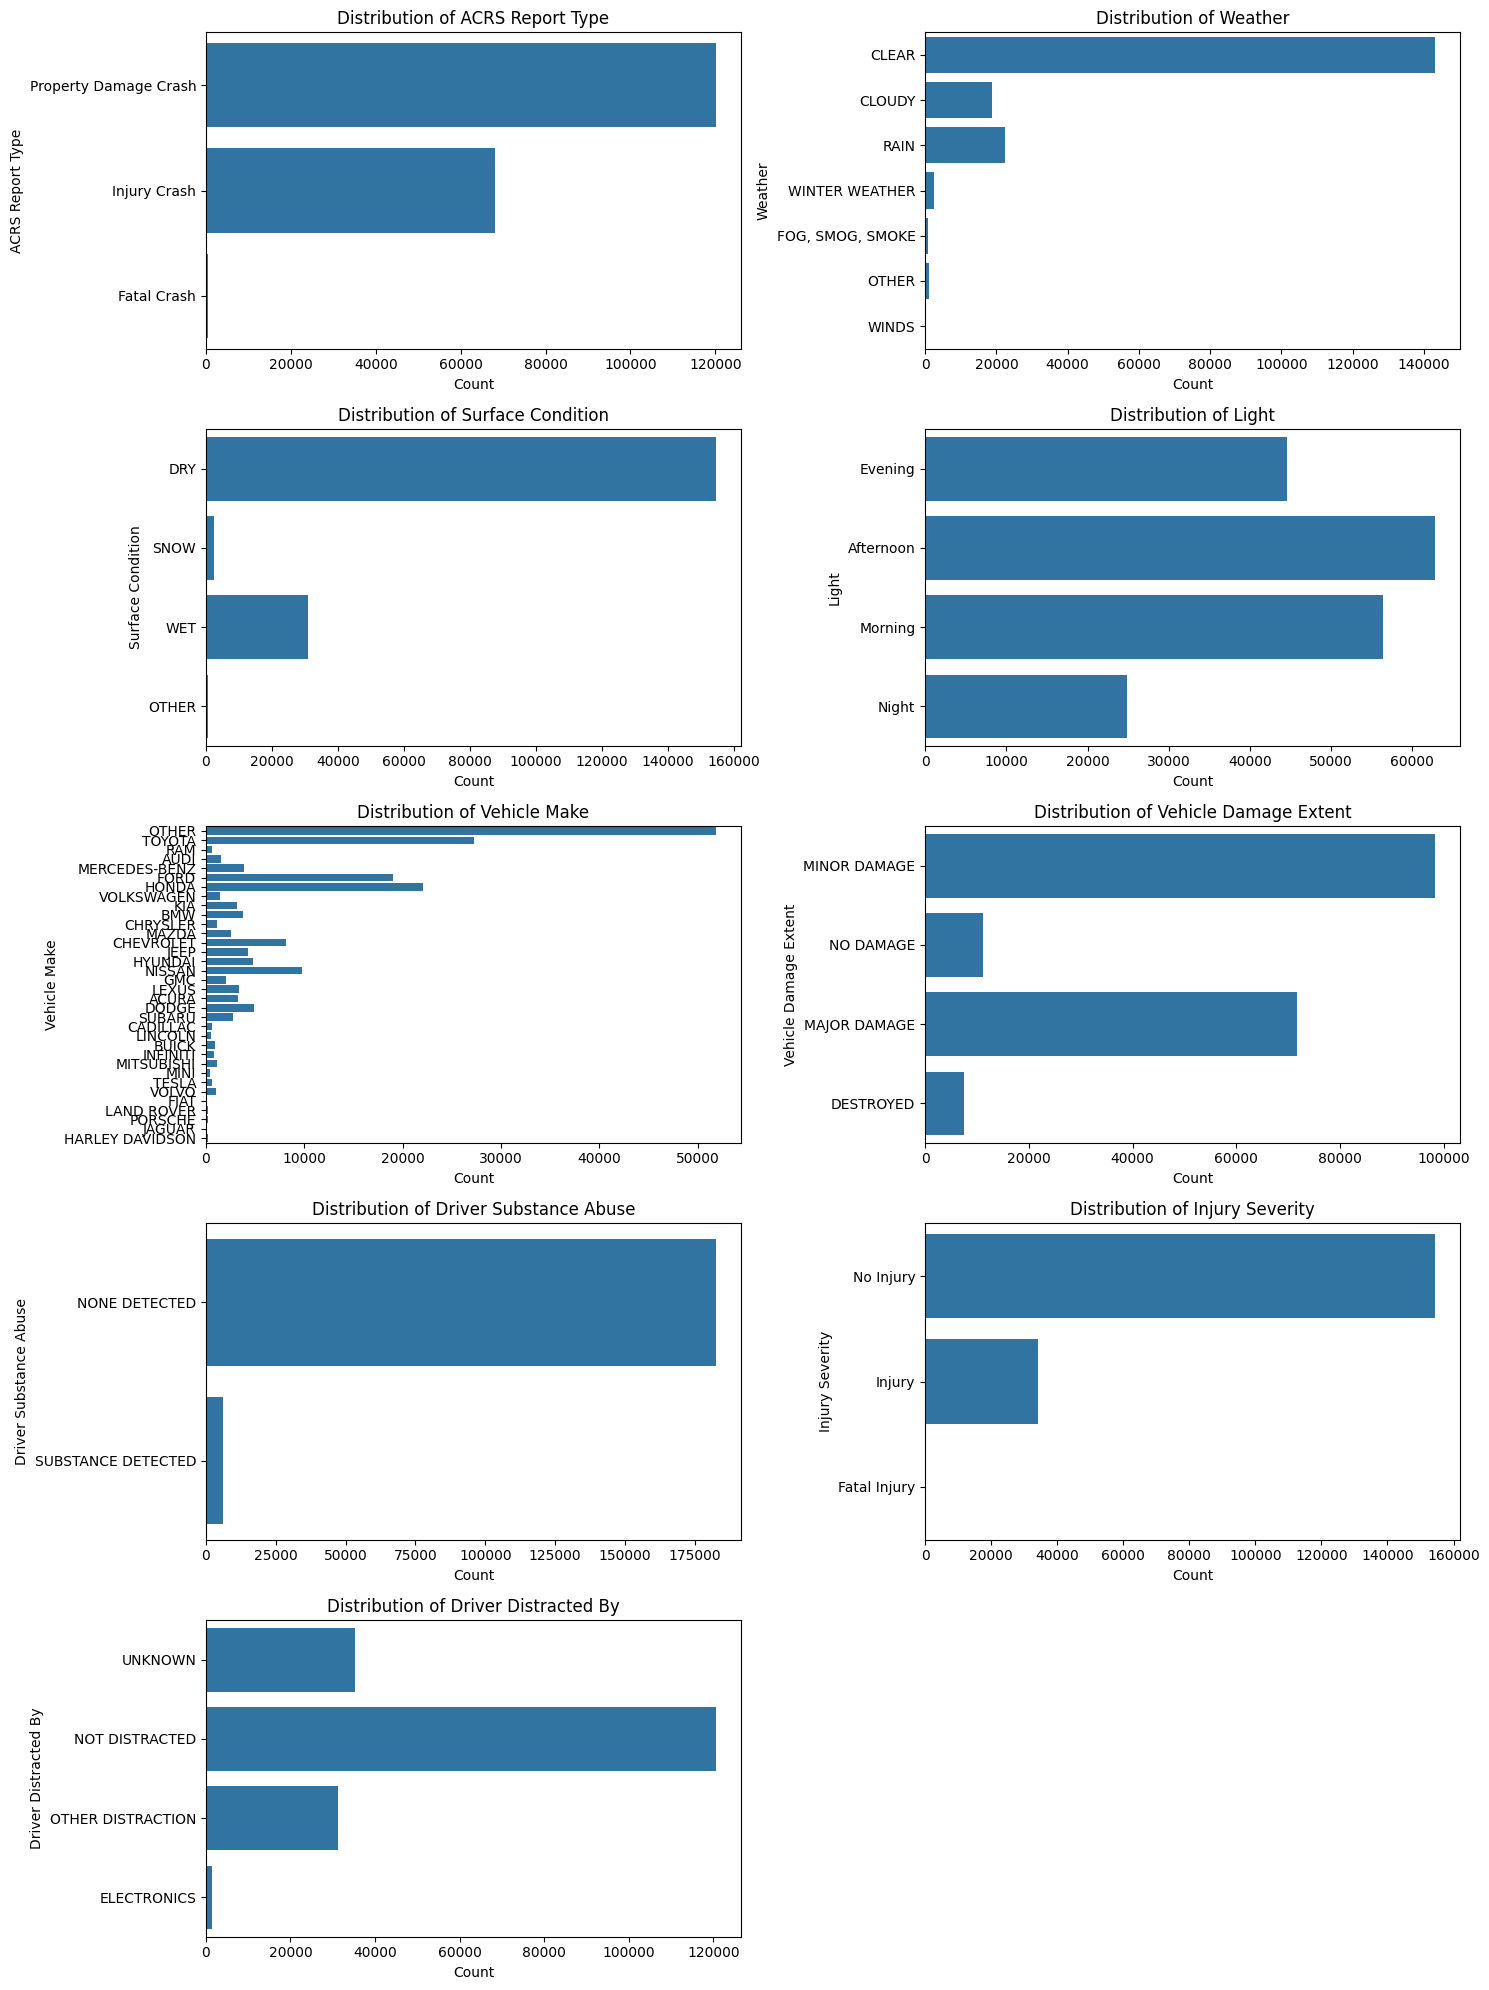

In [51]:
categorical_columns = ['ACRS Report Type', 'Weather', 'Surface Condition', 'Light', 'Vehicle Make', 'Vehicle Damage Extent', 'Driver Substance Abuse', 'Injury Severity', 'Driver Distracted By']

# Set up the subplot grid
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=df_copy, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

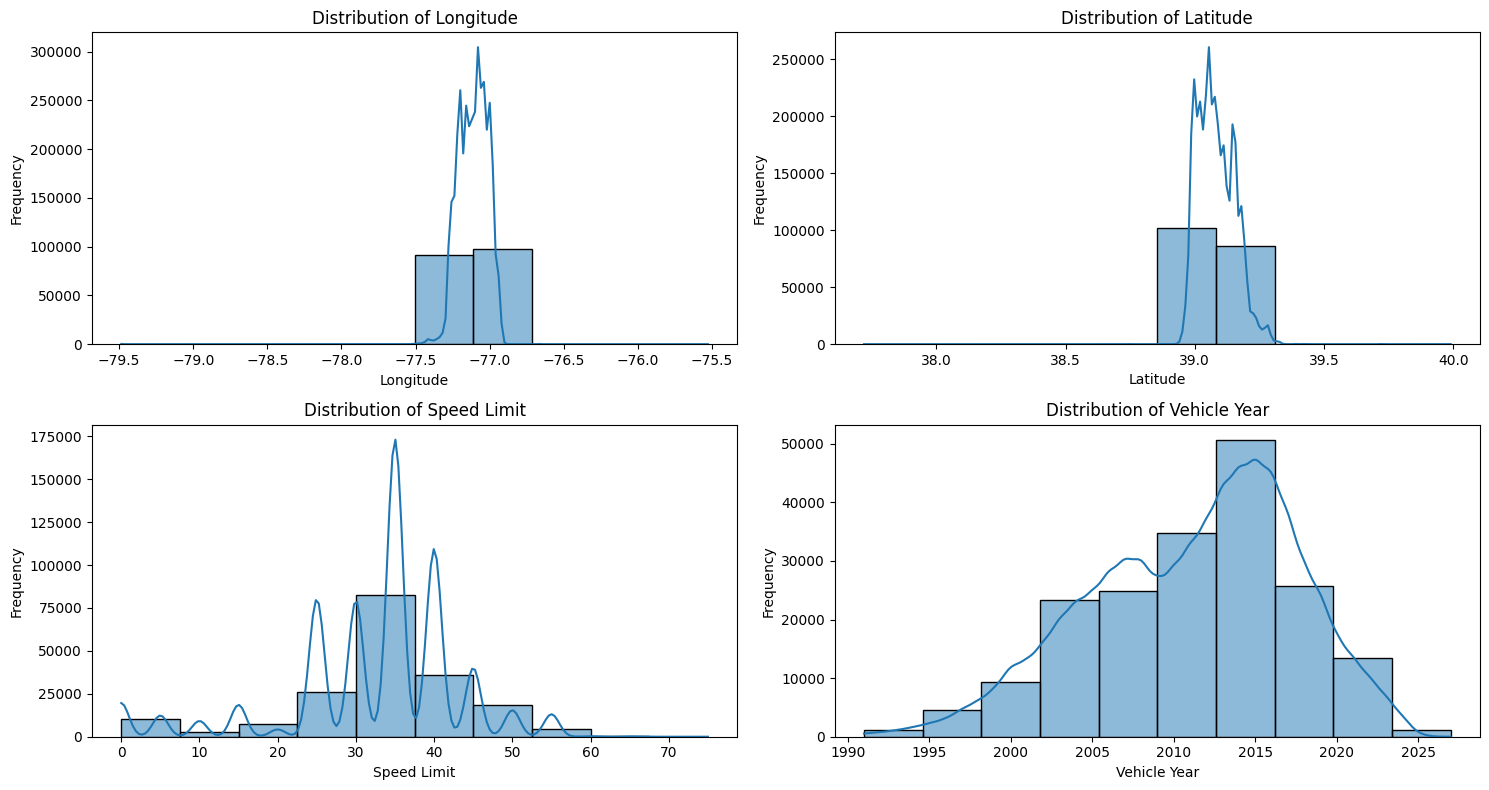

In [52]:
numerical_columns = ['Longitude', 'Latitude', 'Speed Limit', 'Vehicle Year']

# Set up the subplot grid
num_cols = 2
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_copy[col], bins=10, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()